In [47]:
# coding:utf-8

import pandas as pd

xgb100 = pd.read_csv('../datas/xgb_40_filter_ytest_pred')
adboost80 = pd.read_csv('../datas/adboost_80_filter_ytest_pred')
lgb80 = pd.read_csv('../datas/lgb80_filter_ytest_pred')

In [ ]:
al = pd.read_csv

In [73]:
t_trade = pd.read_csv('../datas/t_trade.csv')
t_trade_test = pd.read_csv('../datas/t_trade_test.csv')
t_trade_test['is_risk'] = -1
t_trade = pd.concat([t_trade,t_trade_test])
t_trade['time'] = t_trade['time'].map(lambda x:x[:7])
t_trade.head()

,rowkey,time,id,is_risk
0,3,2015-01,27863,0
1,6,2015-01,115201,0
2,13,2015-01,143711,0
3,32,2015-01,172699,0
4,43,2015-01,53265,0


In [65]:
t_trade['time'] = t_trade['time'].map(lambda x:x[:7])
t_trade.head()

,rowkey,time,id,is_risk
0,3,2015-01,27863,0
1,6,2015-01,115201,0
2,13,2015-01,143711,0
3,32,2015-01,172699,0
4,43,2015-01,53265,0


In [74]:
dt = t_trade[['time','is_risk']].groupby('time').count()
dt.head()

,is_risk
time,
2015-01,23812
2015-02,21991
2015-03,22563
2015-04,16922
2015-05,19309


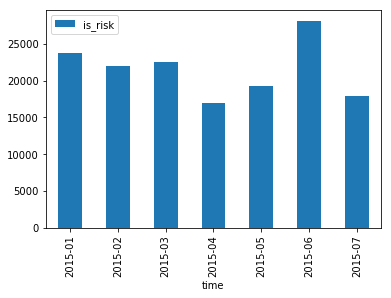

In [75]:
dt.plot.bar()
plt.show()

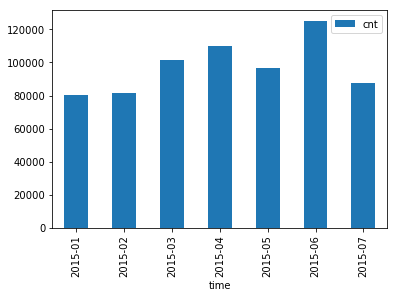

In [76]:
t = pd.read_csv('../datas/t_login.csv')
tt = pd.read_csv('../datas/t_login_test.csv')
t = pd.concat([t,tt])

t['time'] = t['time'].map(lambda x:x[:7])
t['cnt'] = 1
dtt = t[['time','cnt']].groupby('time').sum()

dtt.plot.bar()
plt.show()

In [54]:
import matplotlib.pyplot as plt

In [48]:
xgb100v = pd.read_csv('../datas/xgb_40_filter_yval_pred')
adboost80v = pd.read_csv('../datas/adboost_80_filter_yval_pred')
lgb80v = pd.read_csv('../datas/lgb80_filter_yval_pred')

In [52]:
print xgb100.shape,xgb100v.shape

(17875, 3) (28122, 3)


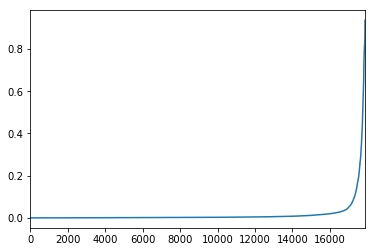

In [58]:
da = xgb100.sort_values('y').reset_index(drop=True)['y']
da.plot()
plt.show()

In [51]:
print xgb100['y'].unique().size,xgb100v['y'].unique().size

16402 25963


In [53]:
a = [ci for ci in xgb100['y'].unique() if ci in xgb100v['y'].unique()]
len(a)

583

In [2]:
pre = pd.read_csv('../datas/pre.csv')
pre.head()

,all_count,p_count,rowkey
0,0,0,3.0
1,0,0,6.0
2,0,0,13.0
3,0,0,32.0
4,0,0,43.0


In [13]:
t_trade = pd.read_csv('../datas/t_trade.csv')
t_trade.head()

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41.0,27863,0
1,6,2015-01-01 00:00:46.0,115201,0
2,13,2015-01-01 00:01:02.0,143711,0
3,32,2015-01-01 00:03:00.0,172699,0
4,43,2015-01-01 00:03:52.0,53265,0


In [20]:
print t_trade[t_trade['is_risk']==0].shape,t_trade[t_trade['is_risk']==1].shape

(129076, 4) (3643, 4)


In [14]:
d = t_trade.merge(pre,how='left')
d.head()

,rowkey,time,id,is_risk,all_count,p_count
0,3,2015-01-01 00:00:41.0,27863,0,0,0
1,6,2015-01-01 00:00:46.0,115201,0,0,0
2,13,2015-01-01 00:01:02.0,143711,0,0,0
3,32,2015-01-01 00:03:00.0,172699,0,0,0
4,43,2015-01-01 00:03:52.0,53265,0,0,0


In [46]:
for i in range(0,3):
    d1 = d[d['all_count']==i]
    print i,d1.shape,
    print d1[d1['is_risk']==1].shape,d1[d1['is_risk']==0].shape


0 (18530, 6) (464, 6) (18066, 6)
1 (14722, 6) (243, 6) (14479, 6)
2 (10170, 6) (220, 6) (9950, 6)


In [43]:
d1.shape

(14722, 6)

In [32]:
d0 = d[d['all_count']==0]
d0.head()

,rowkey,time,id,is_risk,all_count,p_count
0,3,2015-01-01 00:00:41.0,27863,0,0,0
1,6,2015-01-01 00:00:46.0,115201,0,0,0
2,13,2015-01-01 00:01:02.0,143711,0,0,0
3,32,2015-01-01 00:03:00.0,172699,0,0,0
4,43,2015-01-01 00:03:52.0,53265,0,0,0


In [39]:
d0.id.unique().size

8447

In [40]:
d1 = d[d['all_count']==0][d['is_risk']==1]
d1.id.unique().size

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


152

In [41]:
d00 = d[d['all_count']==0][d['is_risk']==0]
d00.id.unique().size

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


8310

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


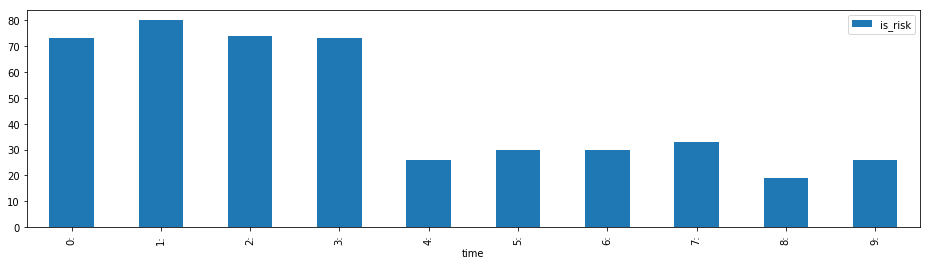

In [33]:
d0['time'] = d0['time'].map(lambda x:x[12:14])
dtime = d0[['time','is_risk']].groupby('time').sum()
dtime.plot.bar(figsize=(16, 4))
plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


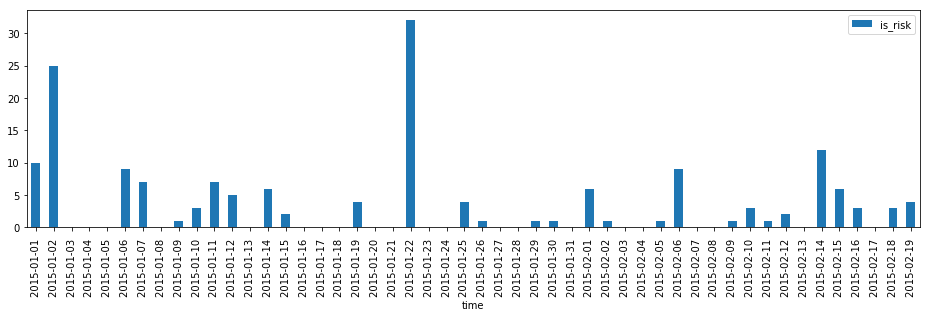

In [30]:
d0['time'] = d0['time'].map(lambda x:x[:11])
dtime = d0[['time','is_risk']].groupby('time').sum()
dtime[:50].plot.bar(figsize=(16, 4))
plt.show()

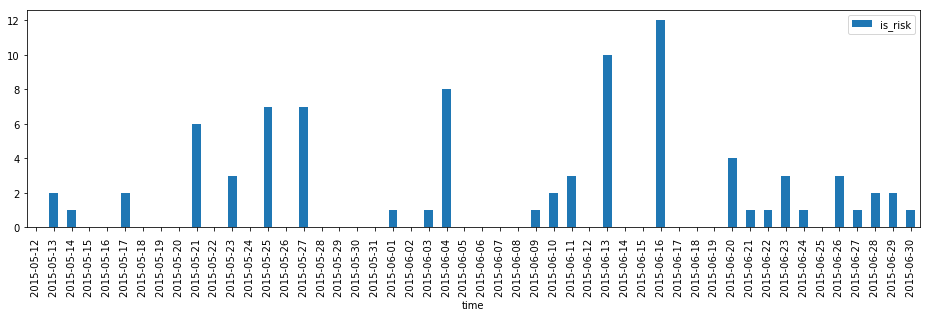

In [31]:
dtime[-50:].plot.bar(figsize=(16, 4))
plt.show()

In [16]:
print d[d['all_count']==0].shape,d[d['p_count']==0].shape

(18530, 6) (19991, 6)


In [18]:
print d[d['all_count']==0][d['is_risk']==0].shape,d[d['all_count']==0][d['is_risk']==1].shape

(18066, 6) (464, 6)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [19]:
print d[d['p_count']==0][d['is_risk']==0].shape,d[d['p_count']==0][d['is_risk']==1].shape

(19493, 6) (498, 6)


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [3]:
d0 = pre[pre['all_count']==0]
d0.shape

(18530, 3)

In [4]:
pre.shape

(132719, 3)

In [8]:
d0p = pre[pre['p_count']==0]
d0p.shape

(19991, 3)

In [5]:
pre_test = pd.read_csv('../datas/pre_test.csv')
pre_test.head()

,all_count,p_count,rowkey
0,0,0,24.0
1,0,0,37.0
2,0,0,45.0
3,0,0,46.0
4,0,0,48.0


In [6]:
d0_test = pre_test[pre_test['all_count']==0]
d0_test.shape

(7000, 3)

In [9]:
d0_testp = pre_test[pre_test['p_count']==0]
d0_testp.shape

(7199, 3)

In [7]:
print pre_test.shape

(17875, 3)


In [12]:
print 1.0*7000/17875,1.0*18530/132719

0.391608391608 0.139618291277
